In [243]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [244]:
gl = pd.read_csv('glass.csv')
gl.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [245]:
gl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [246]:
gl.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
Type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


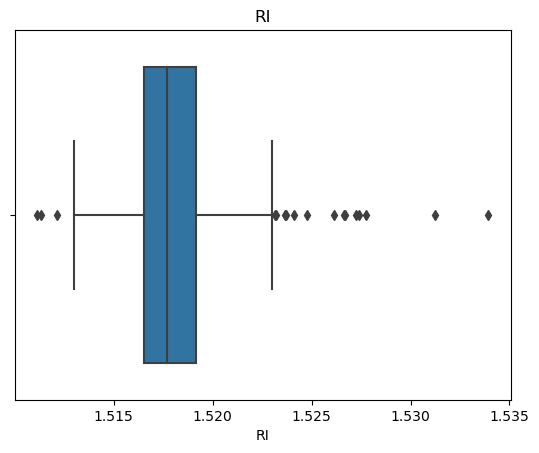

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


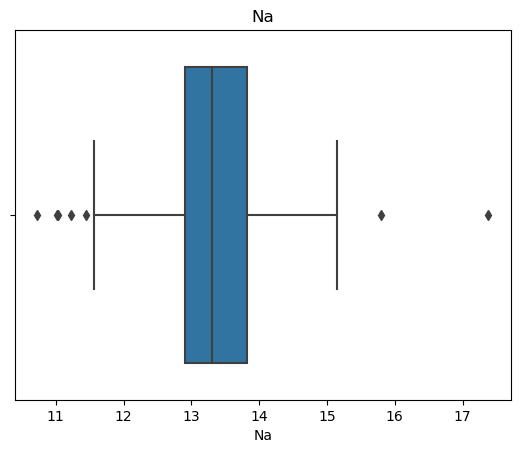

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


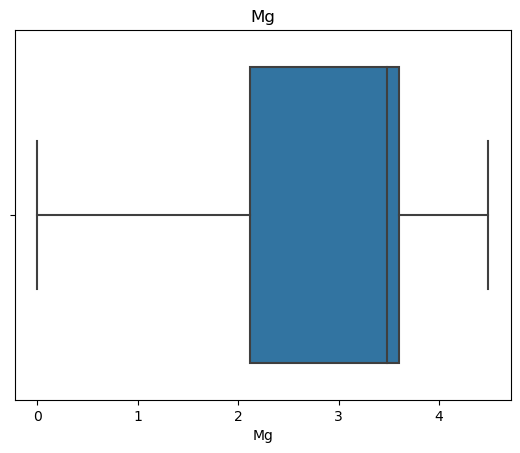

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


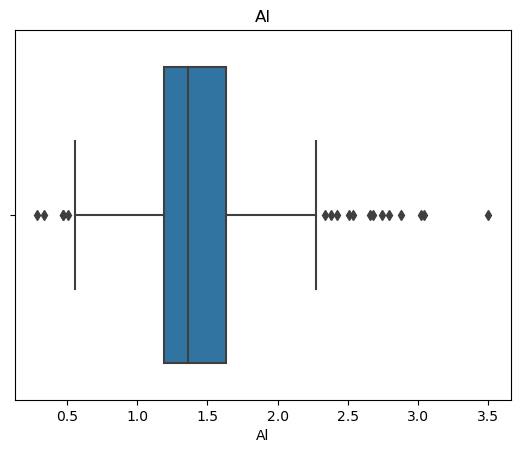

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


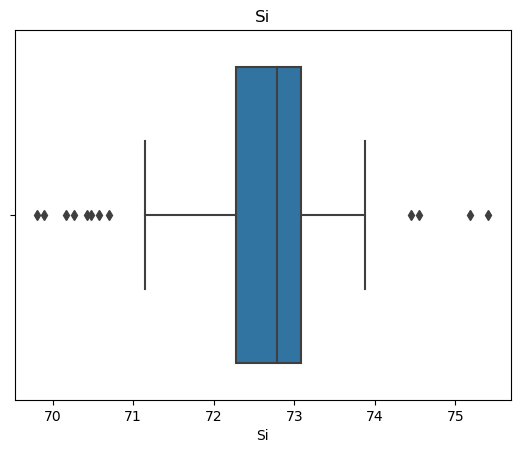

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


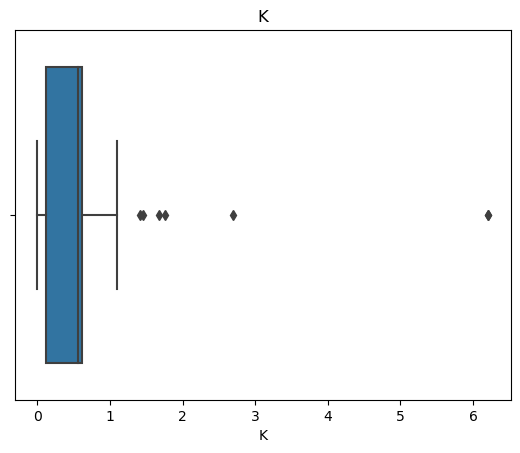

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


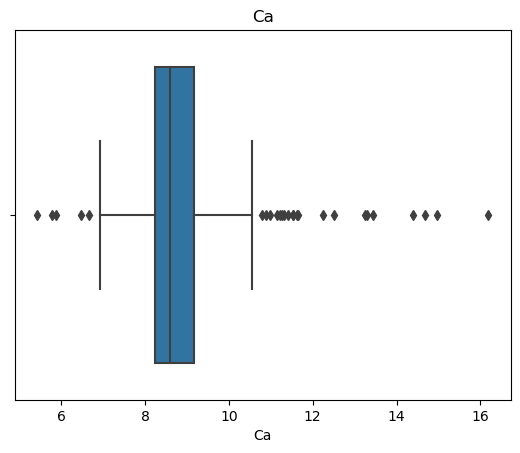

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


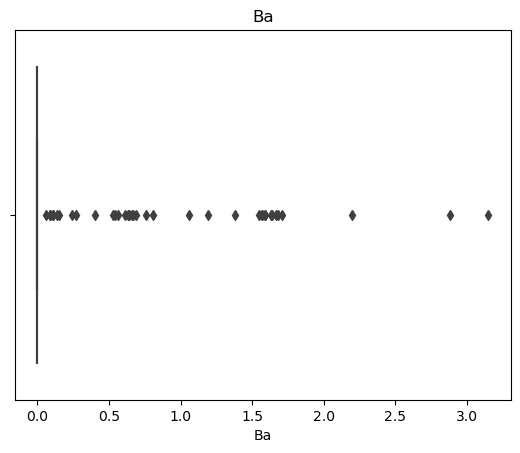

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


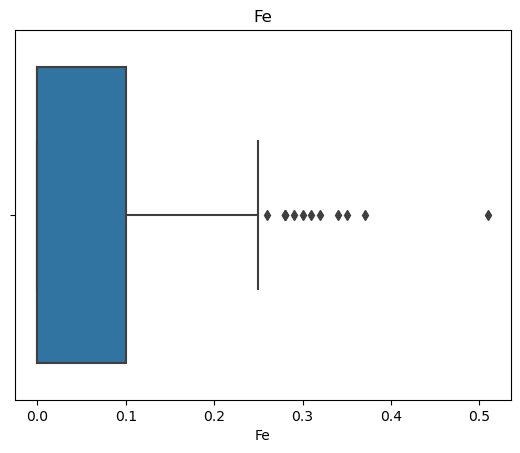

C:\Users\ygred\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


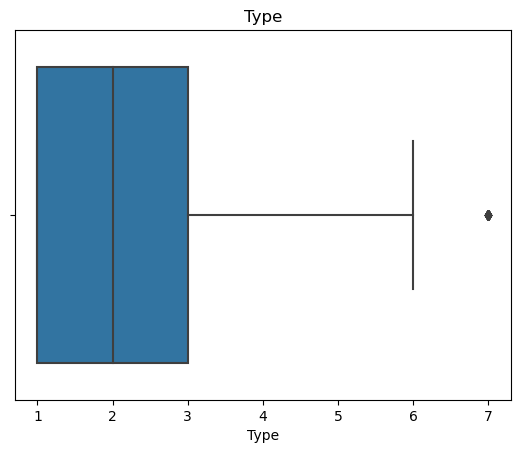

In [247]:
for i in gl.columns:
    sns.boxplot(gl[i])
    plt.title(i)
    plt.show()
    

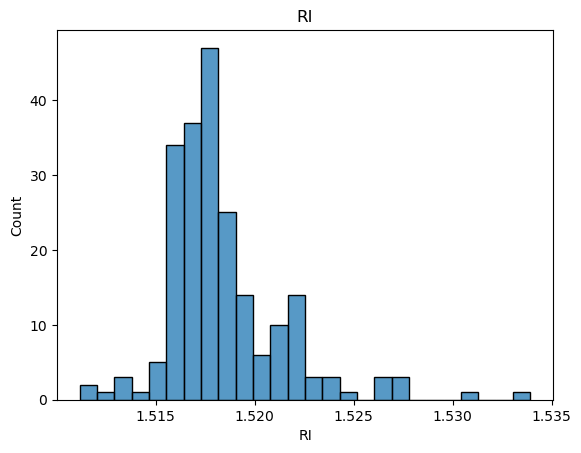

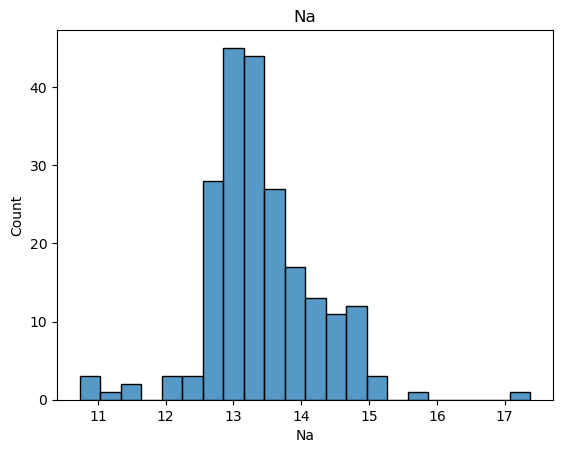

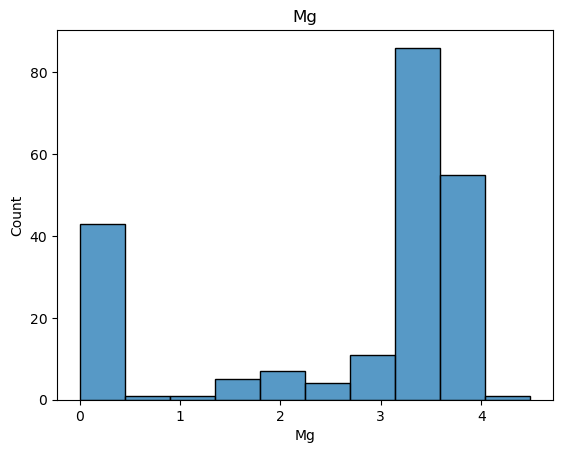

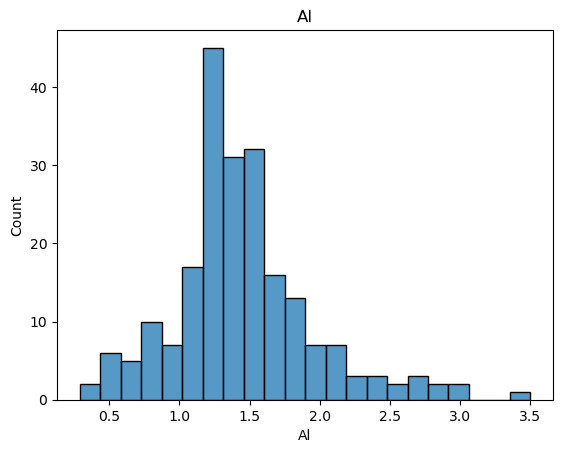

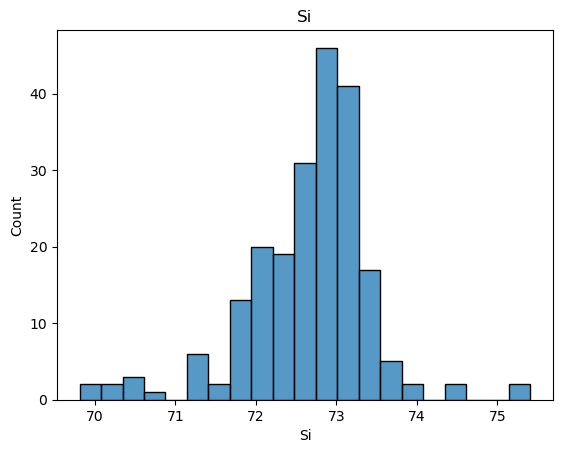

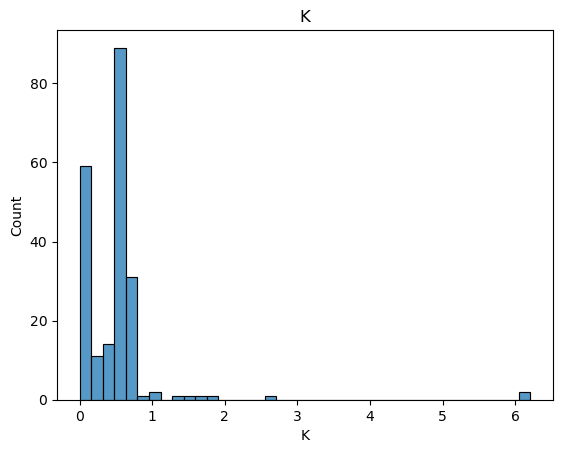

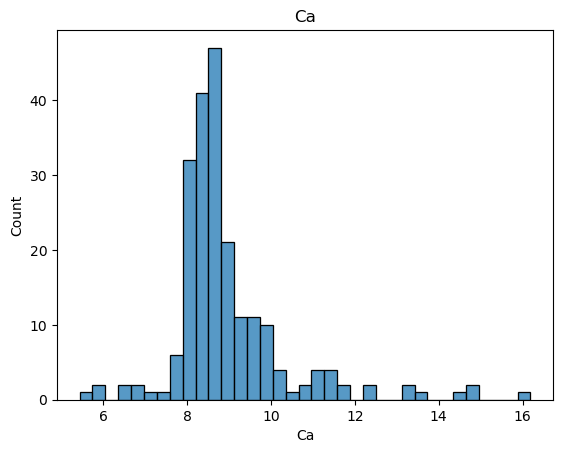

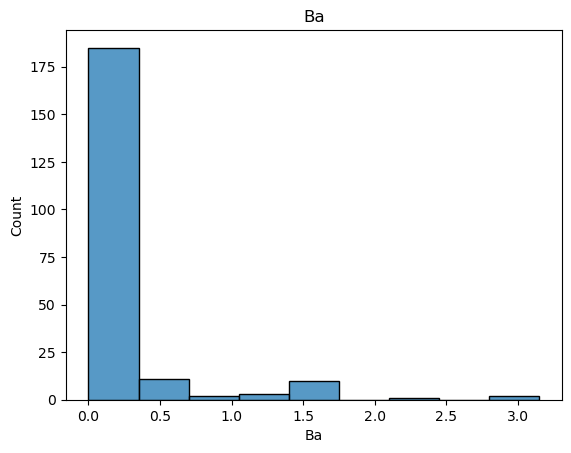

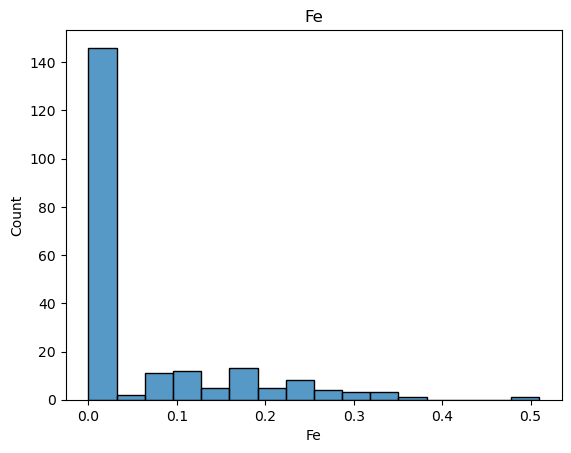

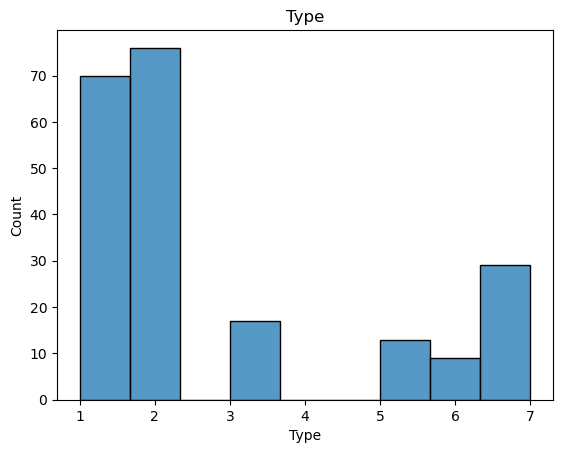

In [248]:
for i in gl.columns:
    sns.histplot(gl[i])
    plt.title(i)
    plt.show()

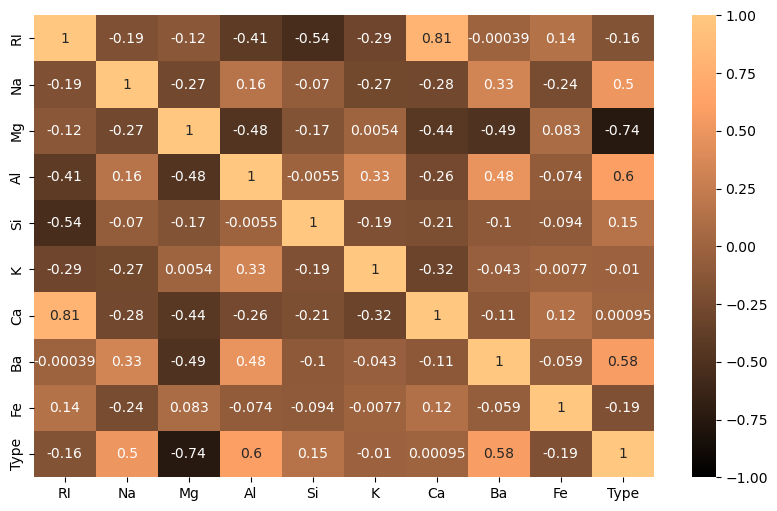

In [249]:
plt.figure(figsize = (10,6))
sns.heatmap(gl.corr(),annot = True ,vmin = -1,vmax = 1,cmap = 'copper')
plt.show()

In [250]:
X = gl.drop(labels= "Type" , axis = 1)
y = gl["Type"]
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [251]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [252]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,-2.877449e-14,1.002345,-2.381516,-0.608273,-0.226229,0.261433,5.137232
Na,214.0,2.179980e-15,1.002345,-3.286943,-0.614158,-0.132382,0.512033,4.875637
Mg,214.0,-2.801497e-16,1.002345,-1.865511,-0.395774,0.552779,0.636168,1.254639
Al,214.0,-3.434428e-16,1.002345,-2.318616,-0.511756,-0.170460,0.371598,4.125851
Si,214.0,9.966067e-16,1.002345,-3.676472,-0.480029,0.179965,0.564962,3.570524
K,214.0,7.470660e-17,1.002345,-0.763919,-0.575650,0.089053,0.173582,8.780145
Ca,214.0,-3.137418e-16,1.002345,-2.484084,-0.504966,-0.251413,0.151806,5.094318
Ba,214.0,-1.763906e-16,1.002345,-0.352877,-0.352877,-0.352877,-0.352877,5.997210
Fe,214.0,-6.121791e-17,1.002345,-0.586451,-0.586451,-0.586451,0.442242,4.659881


In [253]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [254]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [255]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

Evaluate Performance of kNN Model

In [256]:
from sklearn.metrics import accuracy_score

In [257]:
predicted_train_labels = NNH.predict(X_train)
accuracy_score(y_train,predicted_train_labels)

1.0

In [258]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.7538461538461538

In [259]:
accuracy_score(y_test,predicted_labels)

0.7538461538461538

In [260]:
scores =[]
for k in range(1,15):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))

In [261]:
scores

[0.7692307692307693,
 0.7692307692307693,
 0.7538461538461538,
 0.7384615384615385,
 0.7538461538461538,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7384615384615385,
 0.7538461538461538,
 0.7384615384615385,
 0.7230769230769231]

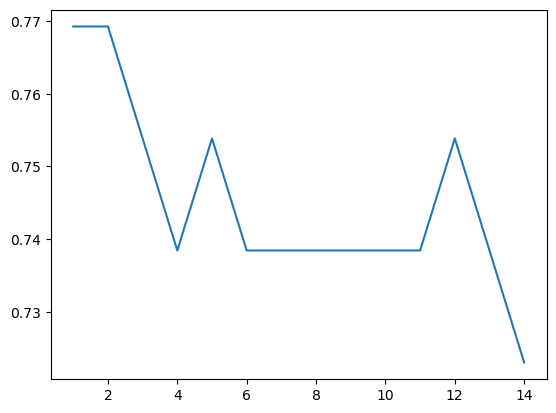

In [262]:
plt.plot(range(1,15),scores)

In [263]:
scores =[]
for k in range(1,15):
    NNH1 = KNeighborsClassifier(n_neighbors = k, weights = 'uniform' )
    NNH1.fit(X_train, y_train)
    scores.append(NNH1.score(X_test, y_test))

C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [264]:
scores

[0.7692307692307693,
 0.7384615384615385,
 0.7384615384615385,
 0.7076923076923077,
 0.7384615384615385,
 0.7076923076923077,
 0.7230769230769231,
 0.7230769230769231,
 0.7384615384615385,
 0.7538461538461538,
 0.7538461538461538,
 0.7384615384615385,
 0.7076923076923077,
 0.7076923076923077]

In [265]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_test)
knn_train_pred = knn_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_train_pred, y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

Accuracy 77.18%
Accuracy 73.85%
[[20  2  5  0  0  0]
 [ 4 17  2  0  0  1]
 [ 1  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  2  0  0  1  0]
 [ 0  0  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.80      0.74      0.77        27
           2       0.81      0.71      0.76        24
           3       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      0.33      0.50         3
           7       0.89      1.00      0.94         8

    accuracy                           0.74        65
   macro avg       0.75      0.63      0.66        65
weighted avg       0.82      0.74      0.77        65



C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# KNN For Zoo Data Set

In [266]:
zo = pd.read_csv('Zoo.csv')
zo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [267]:
zo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [268]:
zo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [269]:
zo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [270]:
from sklearn.preprocessing import LabelEncoder

In [271]:
le = LabelEncoder()
zo['animal name'] = le.fit_transform(zo['animal name'])

In [272]:
zo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [273]:
zo['animal name'].value_counts()

25    2
64    1
74    1
73    1
72    1
     ..
31    1
30    1
29    1
28    1
99    1
Name: animal name, Length: 100, dtype: int64

In [274]:
X = zo.drop(['animal name'],axis = 1)
y = zo['animal name']

In [275]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,8.574000e-17,1.004988,-0.861034,-0.861034,-0.861034,1.161395,1.161395
feathers,101.0,1.319077e-17,1.004988,-0.496904,-0.496904,-0.496904,-0.496904,2.012461
eggs,101.0,1.033277e-16,1.004988,-1.185227,-1.185227,0.843721,0.843721,0.843721
milk,101.0,-9.893076e-17,1.004988,-0.826640,-0.826640,-0.826640,1.209717,1.209717
airborne,101.0,-3.297692e-17,1.004988,-0.558291,-0.558291,-0.558291,-0.558291,1.791182
aquatic,101.0,7.914461e-17,1.004988,-0.744208,-0.744208,-0.744208,1.343710,1.343710
predator,101.0,-2.286400e-16,1.004988,-1.115547,-1.115547,0.896421,0.896421,0.896421
toothed,101.0,1.978615e-16,1.004988,-1.234909,-1.234909,0.809776,0.809776,0.809776
backbone,101.0,8.793846e-17,1.004988,-2.147350,0.465690,0.465690,0.465690,0.465690
breathes,101.0,-6.815230e-17,1.004988,-1.951800,0.512348,0.512348,0.512348,0.512348


In [276]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [277]:
knn = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [278]:
predicted_train = knn.predict(X_train)
accuracy_score(y_train,predicted_train)

0.7

In [279]:
predict_test = knn.predict(X_test)
accuracy_score(y_test,predict_test)

0.0

In [280]:
X = zo.drop(['type'],axis = 1)
y = zo['type']

In [281]:
XScaled  = X.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().T

,count,mean,std,min,25%,50%,75%,max
animal name,101.0,-1.011292e-16,1.004988,-1.708840,-0.841539,-0.008931,0.858370,1.725671
hair,101.0,8.574000e-17,1.004988,-0.861034,-0.861034,-0.861034,1.161395,1.161395
feathers,101.0,1.319077e-17,1.004988,-0.496904,-0.496904,-0.496904,-0.496904,2.012461
eggs,101.0,1.033277e-16,1.004988,-1.185227,-1.185227,0.843721,0.843721,0.843721
milk,101.0,-9.893076e-17,1.004988,-0.826640,-0.826640,-0.826640,1.209717,1.209717
airborne,101.0,-3.297692e-17,1.004988,-0.558291,-0.558291,-0.558291,-0.558291,1.791182
aquatic,101.0,7.914461e-17,1.004988,-0.744208,-0.744208,-0.744208,1.343710,1.343710
predator,101.0,-2.286400e-16,1.004988,-1.115547,-1.115547,0.896421,0.896421,0.896421
toothed,101.0,1.978615e-16,1.004988,-1.234909,-1.234909,0.809776,0.809776,0.809776
backbone,101.0,8.793846e-17,1.004988,-2.147350,0.465690,0.465690,0.465690,0.465690


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [283]:
knn1 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance',leaf_size= 10 )
knn1.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, weights='distance')

In [284]:
predicted_train = knn1.predict(X_train)
accuracy_score(y_train,predicted_train)

1.0

In [285]:
predicted_test = knn1.predict(X_test)
accuracy_score(y_test,predicted_test)

0.5294117647058824

In [286]:
knn_clf = KNeighborsClassifier()
knn_model = knn_clf.fit(X_train, y_train)
knn_prediction = knn_clf.predict(X_test)
knn_train_pred = knn_clf.predict(X_train)

print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_train_pred, y_train)))
print("Accuracy {0:.2f}%".format(100*accuracy_score(knn_prediction, y_test)))

# Display the Confusion Matrix and Classification Report 
print(confusion_matrix(knn_prediction, y_test))
print(classification_report(knn_prediction, y_test))

Accuracy 56.72%
Accuracy 44.12%
[[14  2  2  0  2  2  2]
 [ 3  0  0  1  0  3  1]
 [ 0  0  0  0  0  0  0]
 [ 0  1  0  1  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.82      0.58      0.68        24
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         0
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.44        34
   macro avg       0.19      0.15      0.17        34
weighted avg       0.61      0.44      0.51        34



C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ygred\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim